### Import the necessary libraries


In [25]:
import os
import torch
import configparser

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torchvision
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
from PIL import Image


In [21]:
class Cutout(object):
    def __init__(self, n_holes, length):
        self.n_holes = n_holes
        self.length = length

    def __call__(self, img):
        img = img.numpy()  # Convert to numpy array
        h, w = img.shape[1], img.shape[2]
        
        for _ in range(self.n_holes):
            y = np.random.randint(0, h)
            x = np.random.randint(0, w)
            y1 = np.clip(y - self.length // 2, 0, h)
            y2 = np.clip(y + self.length // 2, 0, h)
            x1 = np.clip(x - self.length // 2, 0, w)
            x2 = np.clip(x + self.length // 2, 0, w)
            img[:, y1:y2, x1:x2] = 0  # Cut out the area
        return torch.from_numpy(img)

# Add Cutout to the transformation pipeline
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    Cutout(n_holes=1, length=16),  # 1 hole of size 16x16
    transforms.Normalize((0.5,), (0.5,))
])


In [22]:
# Assume images are organized in subdirectories by class
config = configparser.ConfigParser()
# config.read("config.ini")
# image_path = str(config["Paths"]["img_root_dir"]) +"constellation_dataset_1"
image_path = "E:\\University\\CU_Classes\\Year-1\\Fall 2024\\CSCI_5502_Data Mining\\Milestone_project\\stellar_mapping\\data\\constellation_dataset_1"
dataset = ImageFolder(root=image_path, transform=transform)

In [23]:
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

In [24]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

### SAMPLE OF BEFORE AND AFTER DATA PREPROCESSING

In [35]:
# Load an example image
image_path = "E:\\University\\CU_Classes\\Year-1\\Fall 2024\\CSCI_5502_Data Mining\\Milestone_project\\stellar_mapping\\data\\constellation_dataset_1\\train\\2022-01-01-00-00-00-n_png_jpg.rf.5580adccdffdeec8218e5e8e5e494234.jpg"
original_image = Image.open(image_path)


In [36]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Adjust for grayscale if needed
])


In [37]:
transformed_image = transform(original_image)

In [38]:
transformed_image_np = transformed_image.numpy()
# Denormalize for viewing
transformed_image_np = (transformed_image_np * 0.5 + 0.5)  # Scale back to [0, 1]


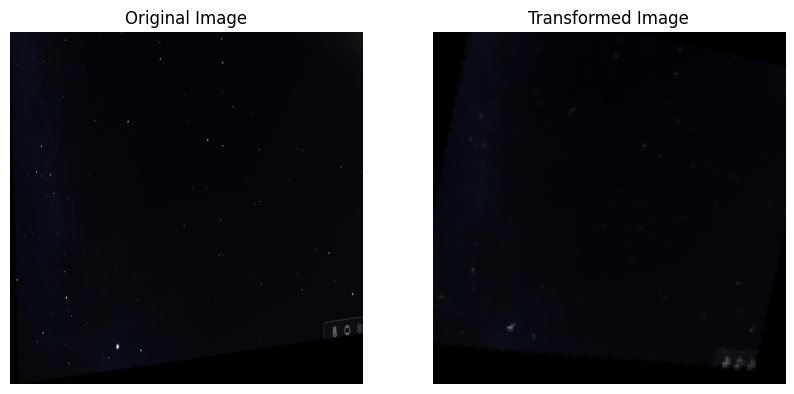

In [39]:
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')

# Transformed Image
plt.subplot(1, 2, 2)
plt.imshow(np.transpose(transformed_image_np, (1, 2, 0)))  # Change channel order
plt.title('Transformed Image')
plt.axis('off')

plt.show()
